In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#import the data
train = pd.read_csv('./titanic/train.csv')

### Data Preprocessing

#### Check for missing values

<AxesSubplot:>

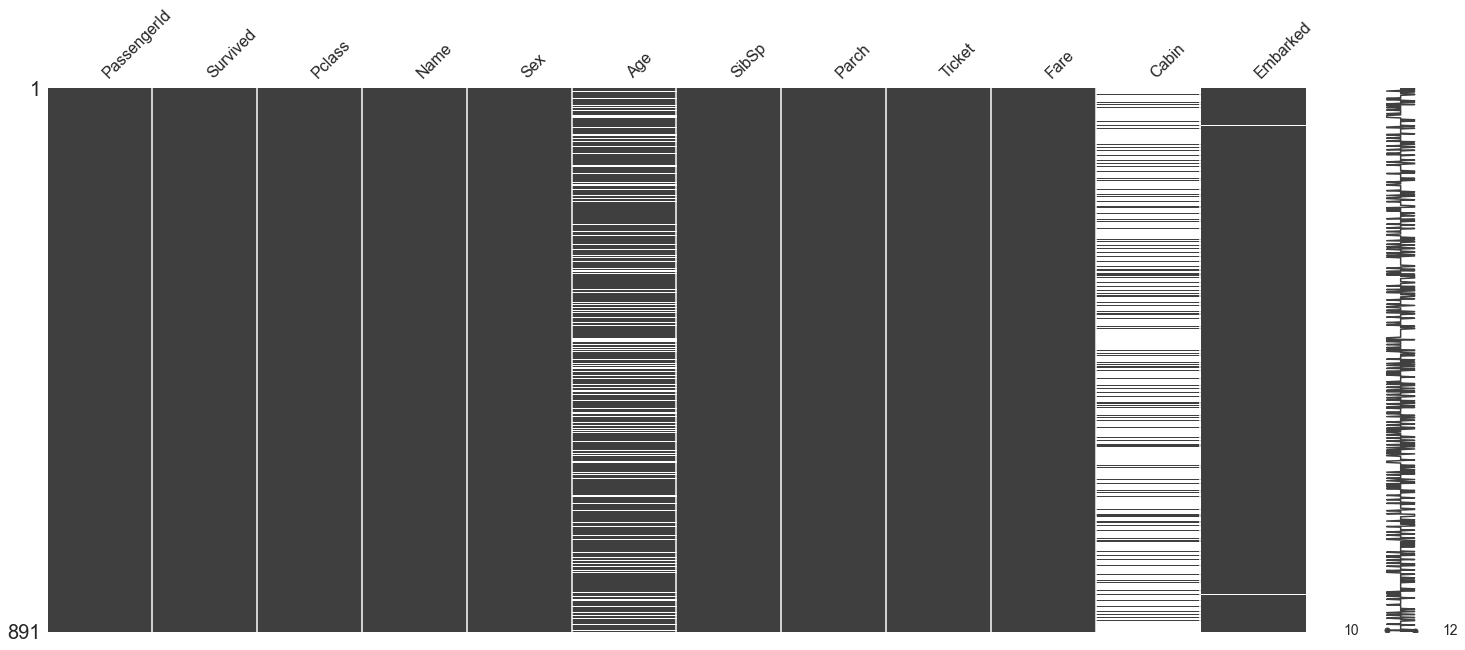

In [3]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

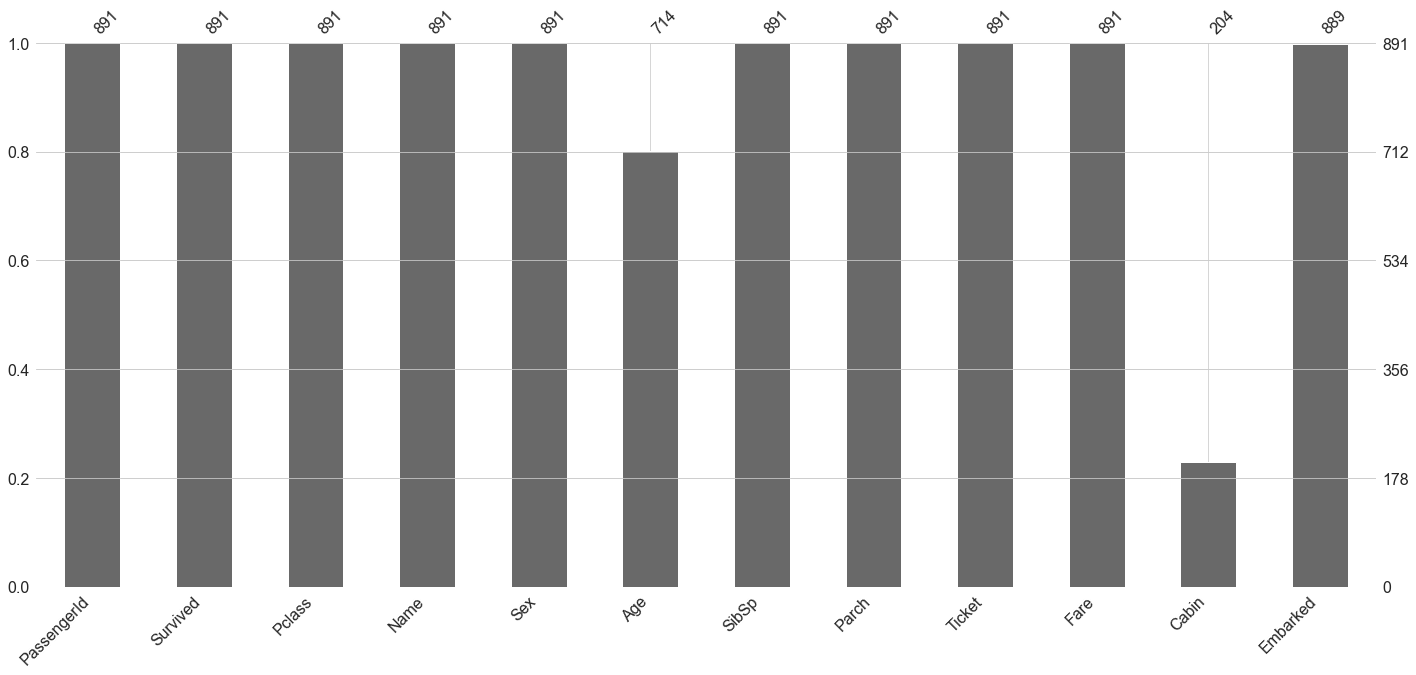

In [4]:
msno.bar(train)

In [5]:
#Delete 'Cabin' column as it has a a lot of missing values
del train['Cabin']

In [6]:
#analysis of the missing persons
train[(train['Age'].isnull()) & train['Survived'] == 1]
print(f"Persons with Missing Age that survived {len(train[(train['Age'].isnull()) & train['Survived'] == 1])}")


train[(train['Age'].isnull()) & train['Survived'] == 0]
print(f"Persons with Missing Age that didn\'t survived {len(train[(train['Age'].isnull()) & (train['Survived'] == 0)])}")

Persons with Missing Age that survived 52
Persons with Missing Age that didn't survived 125


Missing Age could be an important feature.Let's create an missing_age indicator

In [7]:
train['Age_missing'] = np.where(train['Age'].isnull(),1,0)

In [8]:
#replace the misssing values of 'Age' column with the median age
# train['Age'] = train['Age'].fillna(train['Age'].median())

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
#repalce the missing values 'Embarked' column with the highest occuring frequency.
train['Embarked'] = train['Embarked'].fillna('S') 

### Explanatory Data Analysis

In [11]:
 train.describe().T

count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   
Age_missing  891.0    0.198653    0.399210  0.00    0.0000    0.0000    0.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp          8.0000  
Parch          6.0000  
Fare         512.3292  
Age_missing    1.0000

#### Column : Survived
<br>

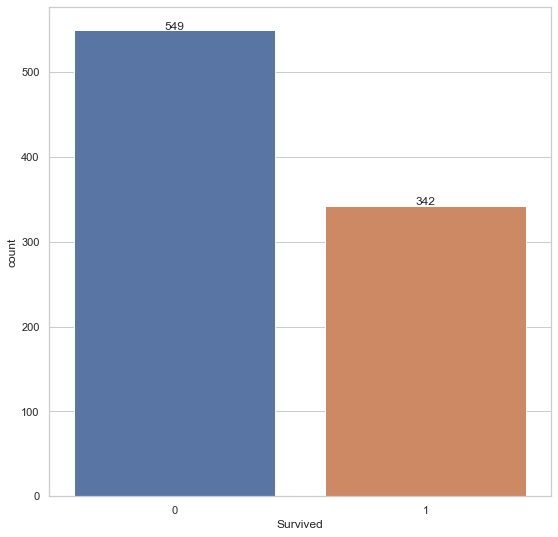

In [12]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize = (9,9))
sns.countplot(x="Survived", data=train)
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

In [13]:
fig = px.pie(train,values="Survived",names="Sex",template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.update(layout_title_text='Sex composition of Survive Passengers',
           layout_showlegend=False)

#### <li>Only about 38.38 % (342) of the total passengers (891) survived.

#### Column : Pclass
<br>

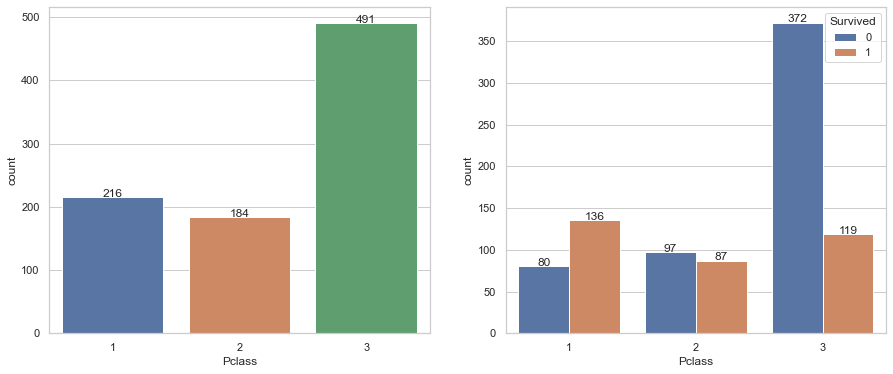

In [14]:
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Pclass", data=train,ax = ax[0])
sns.countplot(x="Pclass",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 62.968 % (136) of the 1st classs passengers (216) survived.
#### <li>Only 24.23% (119) of the 3rd classs passengers (491) survived.

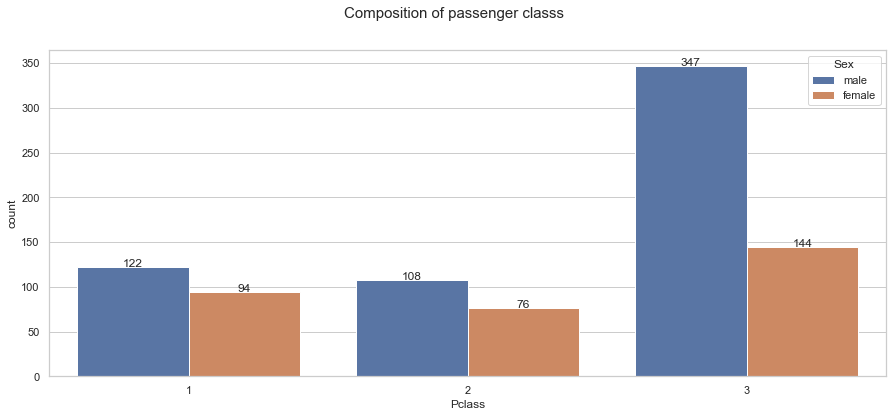

In [15]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x="Pclass",hue = 'Sex',data=train)
fig.suptitle('Composition of passenger classs', fontsize =15)
#annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

Text(0.5, 0.98, 'Survival Rate vs Ticket class ')

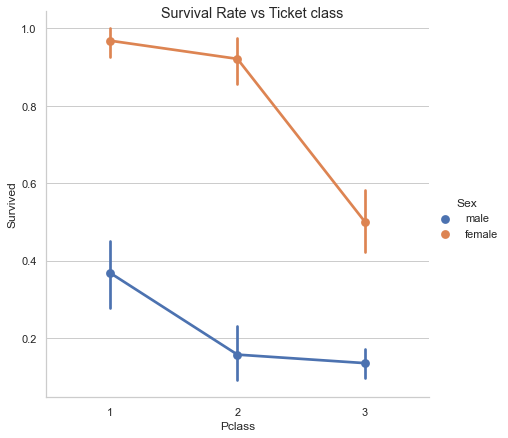

In [16]:
ax = sns.catplot(x ='Pclass', y ='Survived',hue = 'Sex',kind = 'point' ,data = train,height = 6)
ax.fig.suptitle('Survival Rate vs Ticket class ')

Text(0.5, 0.98, 'Sex Composition of passenger classs')

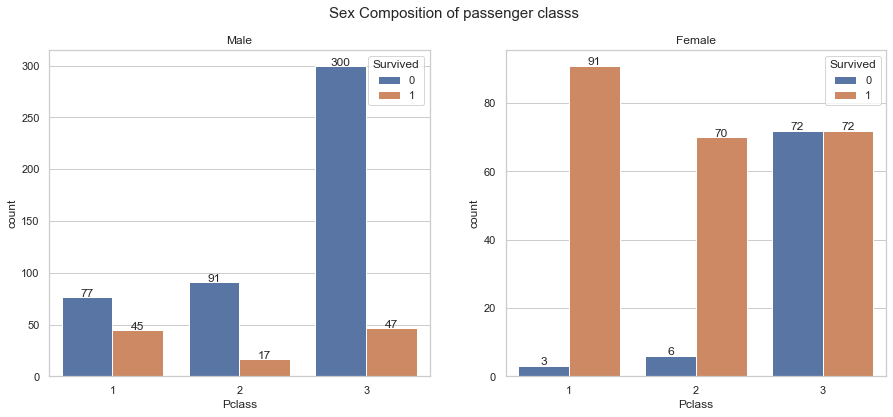

In [17]:
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Pclass",hue = 'Survived',data=train[train['Sex'] == 'male'],ax = ax[0])
sns.countplot(x="Pclass",hue = 'Survived', data=train[train['Sex'] == 'female'],ax = ax[1])
ax[0].set_title('Male')
ax[1].set_title('Female')
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")
fig.suptitle('Sex Composition of passenger classs', fontsize =15)        

#### <li>About 96.68 % (91) of the female 1st classs passengers (94) survived.
#### <li>Only 13.54% (47) of the male 3rd classs passengers (347) survive

Text(0.5, 0.98, 'Age distribution of passenger classs')

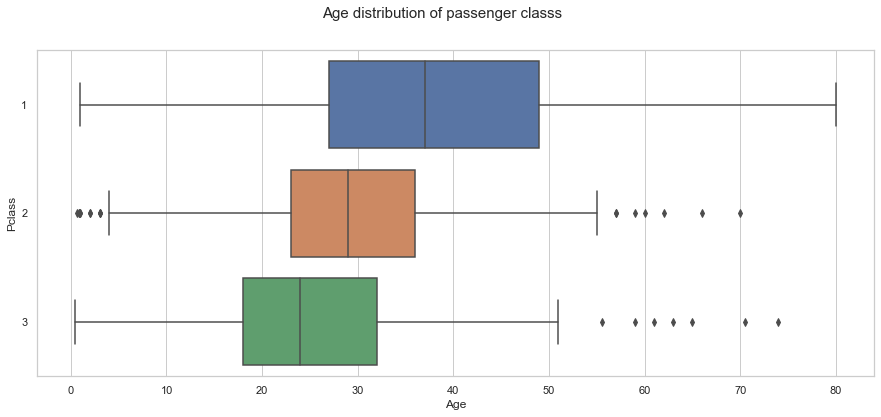

In [18]:
fig,ax = plt.subplots(figsize = (15,6))
ax = sns.boxplot(y="Pclass", x="Age",orient="h", data=train)
fig.suptitle('Age distribution of passenger classs', fontsize=15)

In [19]:
fig = px.pie(train,
             values="Fare",
             names="Pclass",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.update(layout_title_text='Percentage of Fare collected through Pclass',
           layout_showlegend=False)
fig.show()


In [20]:
print('Total Passengers by Pclass')
print(train['Pclass'].value_counts())

Total Passengers by Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [21]:
print('Total Survived Passengers by Pclass')
print(train[train['Survived'] == 1]['Pclass'].value_counts())

Total Survived Passengers by Pclass
1    136
3    119
2     87
Name: Pclass, dtype: int64


In [22]:
print('Percentage of  Survived Passengers by Pclass')
train[train['Survived'] == 1]['Pclass'].value_counts() / train['Pclass'].value_counts()

Percentage of  Survived Passengers by Pclass


1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64

#### <li>About 55.1 % (491) of the total passengers (891) booked 3rd class ticket.
#### <li>About 62.96 % (136) of the total 1st classs passengers (184) survived.
#### <li>Only 24.23% (119) of the total 3rd classs passengers (491) survived.    

#### Column : Sex
<br>

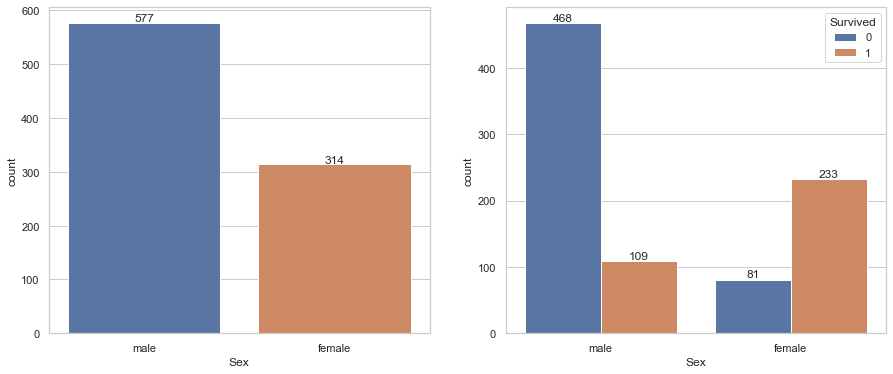

In [23]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Sex", data=train,ax = ax[0])
sns.countplot(x="Sex",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 3,height ,ha="center")

Text(0.5, 0.98, "Distribution of passenger's age")

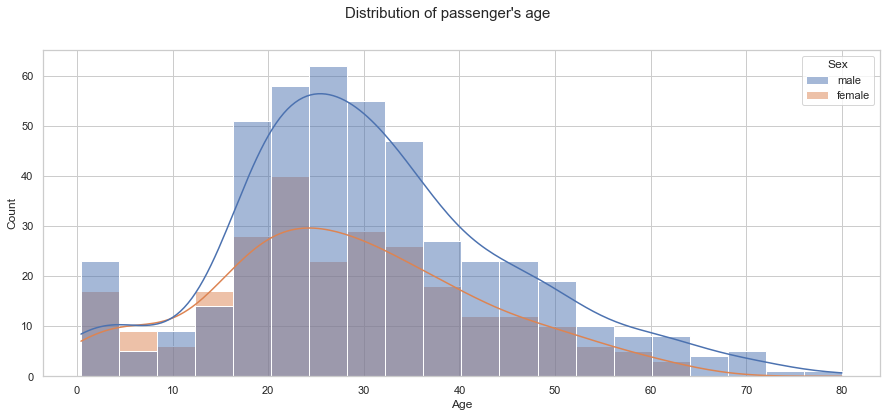

In [24]:
fig,ax = plt.subplots(figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train)
fig.suptitle('Distribution of passenger\'s age', fontsize=15)

In [25]:
print('Passengers composition by Sex')
train['Sex'].value_counts()

Passengers composition by Sex


male      577
female    314
Name: Sex, dtype: int64

In [26]:
print('Survived Passengers composition by Sex')
train[train['Survived'] == 1]['Sex'].value_counts()

Survived Passengers composition by Sex


female    233
male      109
Name: Sex, dtype: int64

#### <li>About 74.2 % (233) of the total Female passengers (314) survived.
#### <li>About 18.89 % (109) of the total Male passengers (577) survived.

#### Column : Age
<br>

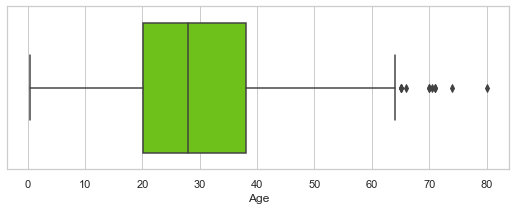

In [27]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Age'],color = '#6edb00')

<AxesSubplot:xlabel='Age', ylabel='Count'>

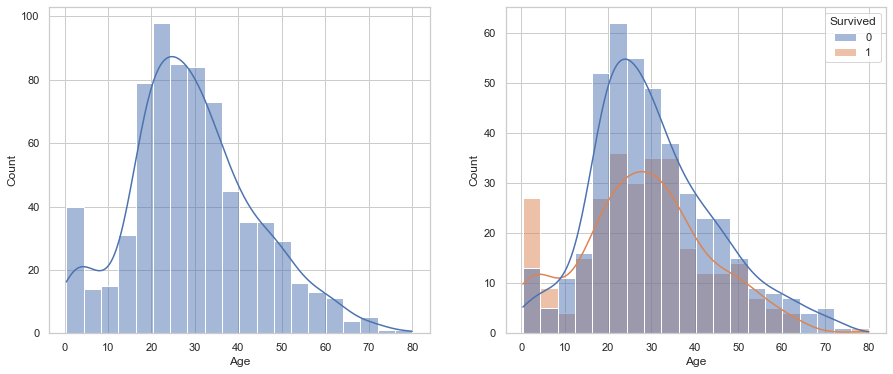

In [28]:

fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Age",kde = True ,data=train,ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train,ax = ax[1])

#### Analysis of minor-passengers

Text(0.5, 0.98, 'Age distribution of minors')

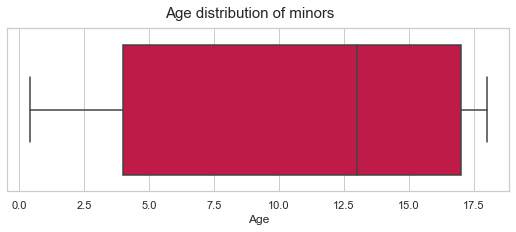

In [29]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x = train[train['Age'] <=18.0]['Age'],color = '#d9003d')
fig.suptitle('Age distribution of minors', fontsize=15)

Text(0.5, 0.98, 'Age distribution of minors')

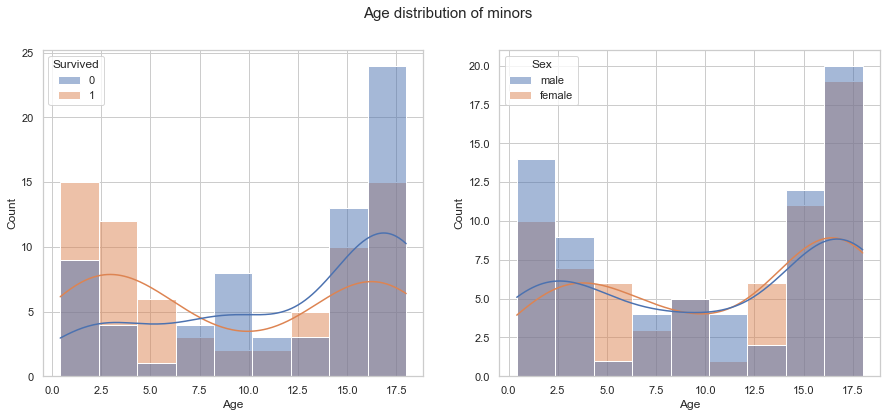

In [30]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['Age'] <=18.0],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['Age'] <=18.0],ax = ax[1])
fig.suptitle('Age distribution of minors', fontsize=15)

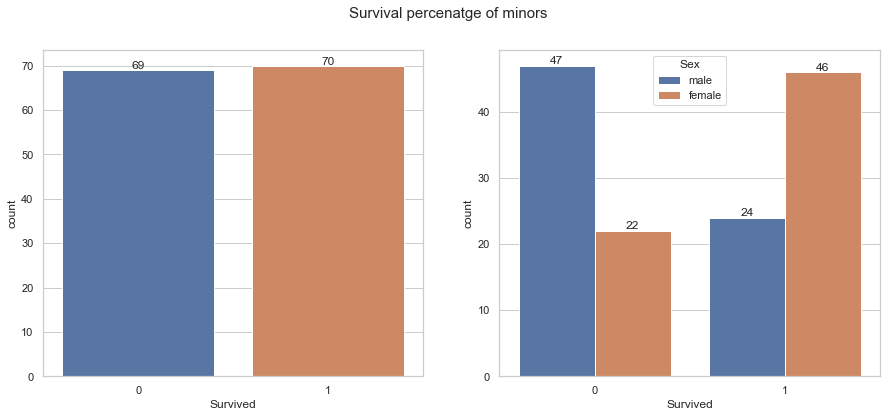

In [31]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Age'] <=18.0],hue = 'Sex',ax = ax[1])
fig.suptitle('Survival percenatge of minors', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [32]:
print('Total minors Sex-wise')
train[train['Age'] <=18.0]['Sex'].value_counts()

Total minors Sex-wise


male      71
female    68
Name: Sex, dtype: int64

Minor's seem to have a bettter chance of survival.Let's add an indicator column

#### <li>About 15.60% (139) of the total passengers (891) were minors. 
#### <li>About 50.35% (70) of the minor passengers (139) survived. 
#### <li>About 67.64% (46) of the female-minor passengers (68) survived.

#### Column : Name
<br>

In [33]:
#extract the initial title of the name
train['Name_prefix'] = train['Name'].apply(lambda x : x.split(',')[1].split('.')[0])

Text(0.5, 0.98, 'Count of prefix names of Passengers')

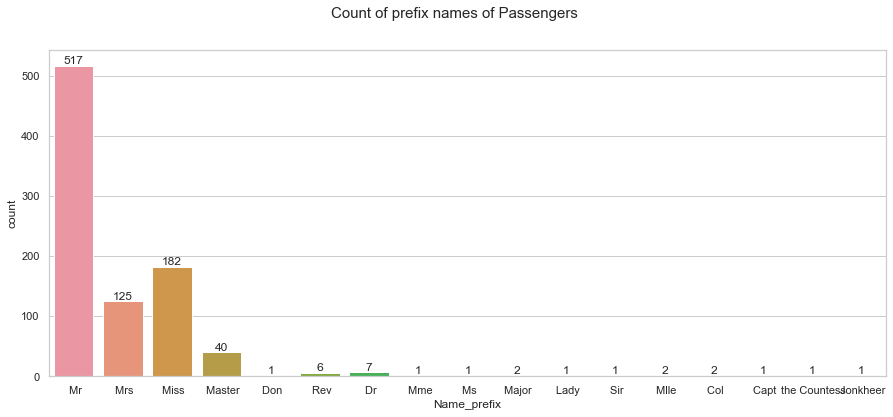

In [34]:
fig,ax = plt.subplots(figsize = (15,6))
ax = sns.countplot(x = 'Name_prefix',data = train)
#annotations
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,height ,ha="center")
fig.suptitle('Count of prefix names of Passengers', fontsize=15)    

Since some of the initial names contains rare features let's convert them into an umbrella category 'Rare'

In [35]:
frequent_initial_names = train['Name_prefix'].value_counts().head(4).index

In [36]:
def rare_names(x):
    if x in frequent_initial_names:
        return x
    else:
        return 'Rare'

In [37]:
#replace all the uncommon names with 'Rare'
train['Name_prefix'] = train['Name_prefix'].apply(lambda x: rare_names(x))

Text(0.5, 0.98, 'Compositon of prefix name')

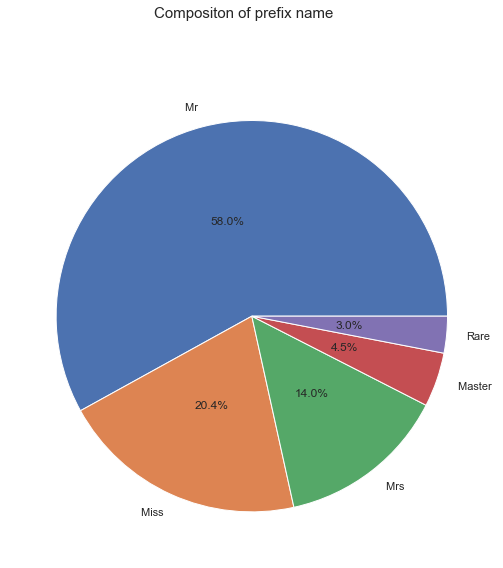

In [38]:
fig,ax = plt.subplots(figsize = (9,9))
ax = plt.pie(x=train['Name_prefix'].value_counts(), autopct="%.1f%%", labels = train['Name_prefix'].value_counts().index,pctdistance=0.5)
fig.suptitle('Compositon of prefix name', fontsize=15)

Text(0.5, 0.98, 'Survival V/s Initial Name')

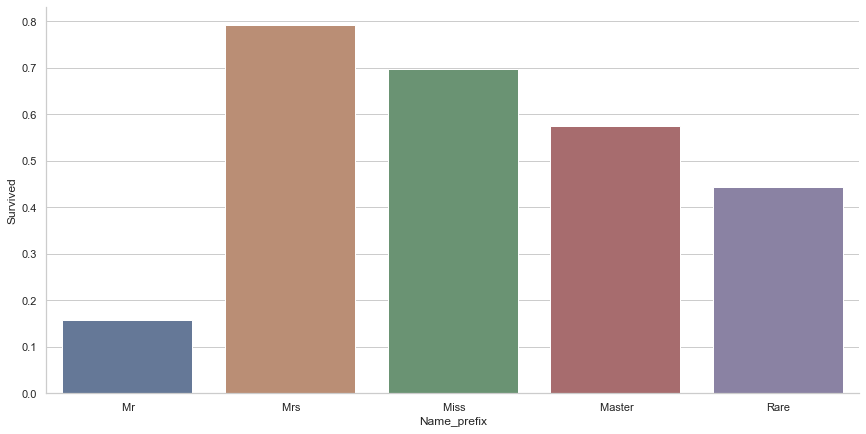

In [39]:
sns.set_style('whitegrid')
sns.catplot(x="Name_prefix", y="Survived",
                data=train, saturation=.5,
                kind="bar", ci=None,  height=6, aspect=2)
fig.suptitle('Survival V/s Initial Name', fontsize=15) 

In [40]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [41]:
def extract_ticket_info(x):
    try:
        x =  x.split(' ')[-2]
        x = x.replace('.','')
        return x.upper()
    except IndexError:
        return 'No pefix'

In [42]:
train['Ticket_prefix'] = train['Ticket'].apply(lambda x : extract_ticket_info(x))

In [43]:
train['Ticket_prefix'] = train['Ticket_prefix'].replace('A/5','A')
train['Ticket_prefix'] = train['Ticket_prefix'].replace('A/4','A')
train['Ticket_prefix'] = train['Ticket_prefix'].replace('A5','A')
train['Ticket_prefix'] = train['Ticket_prefix'].replace('SOTON/OQ','SOTON')
train['Ticket_prefix'] = train['Ticket_prefix'].replace('SOTON/O2','SOTON')

In [44]:
#replace rare Ticket_prefixes with 'Rare'
def rare_ticket(x):
    if len(train[train['Ticket_prefix'] == x]) <= 3:
        return 'Rare'
    else:
        return x

In [45]:
train['Ticket_prefix'] = train['Ticket_prefix'].apply(lambda x: rare_ticket(x))

In [46]:
train['Ticket_prefix'].value_counts()

No pefix    665
PC           60
CA           41
Rare         27
A            27
SOTON        17
2            12
SC/PARIS     11
W/C          10
STON/O2       6
FCC           5
SOC           5
C             5
Name: Ticket_prefix, dtype: int64

Text(0.5, 0.98, 'Survival V/s Initial Name')

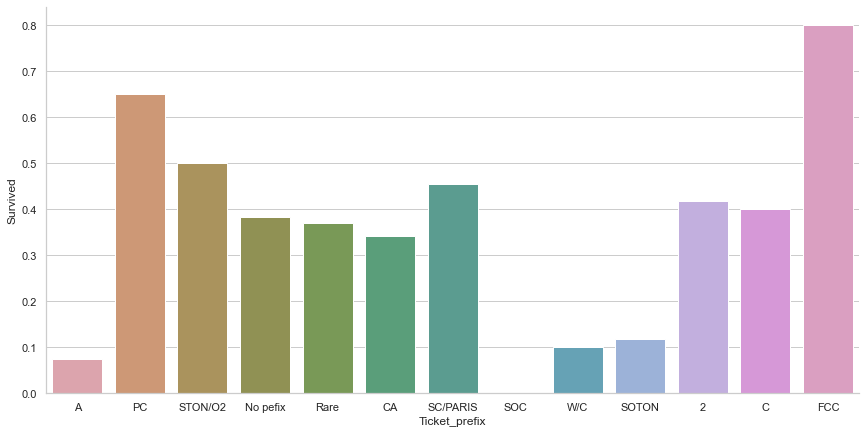

In [47]:
sns.set_style('whitegrid')
sns.catplot(x="Ticket_prefix", y="Survived",
                data=train, saturation=.5,
                kind="bar", ci=None,  height=6, aspect=2)
fig.suptitle('Survival V/s Initial Name', fontsize=15) 

#### Column : SibSp (Number of Siblings / Spouses Aboard)
<br>

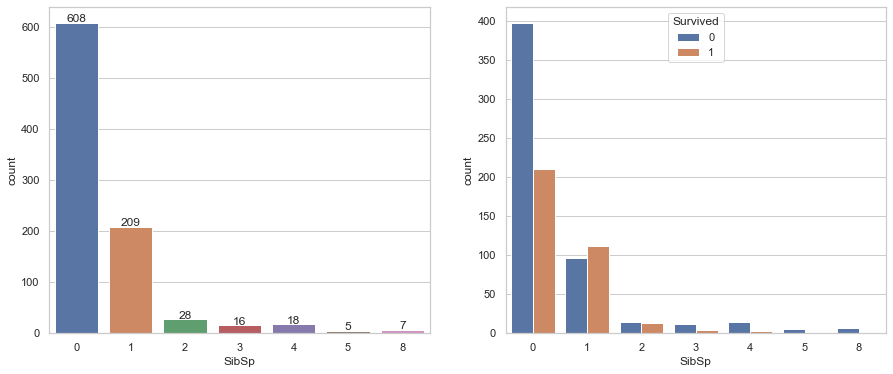

In [48]:

fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="SibSp", data=train,ax = ax[0])
sns.countplot(x="SibSp",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")

Text(0.5, 0.98, 'Survival Rate vs sibling / spouce abord ')

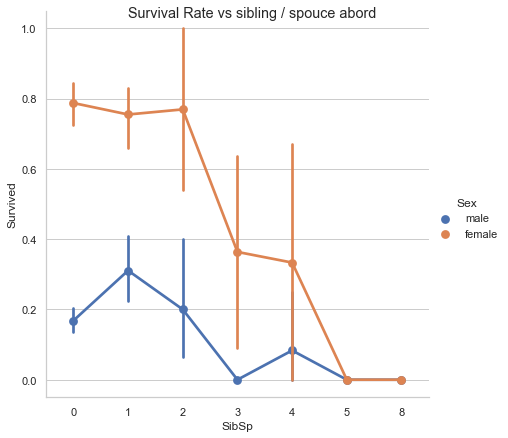

In [49]:
ax = sns.catplot(x ='SibSp', y ='Survived',hue = 'Sex',kind = 'point' ,data = train,height = 6)
ax.fig.suptitle('Survival Rate vs sibling / spouce abord ')

##### Passengers travelling with one or more siblings / spouce.

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with one or more siblings / spouce')

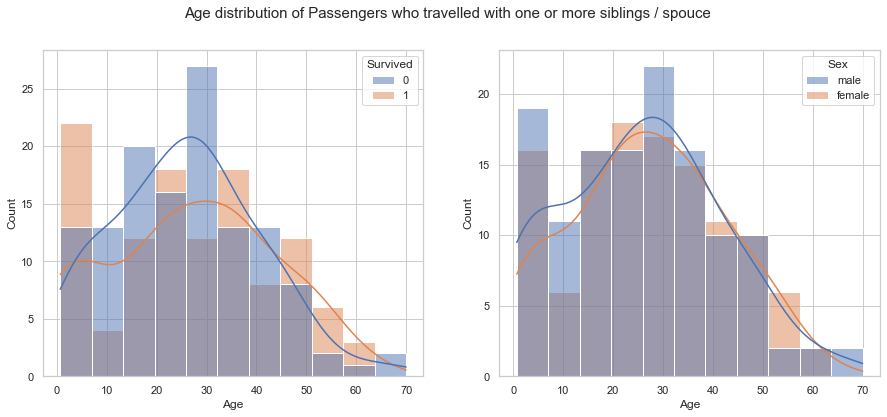

In [50]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['SibSp'] >= 1],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['SibSp'] >= 1],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with one or more siblings / spouce', fontsize=15)

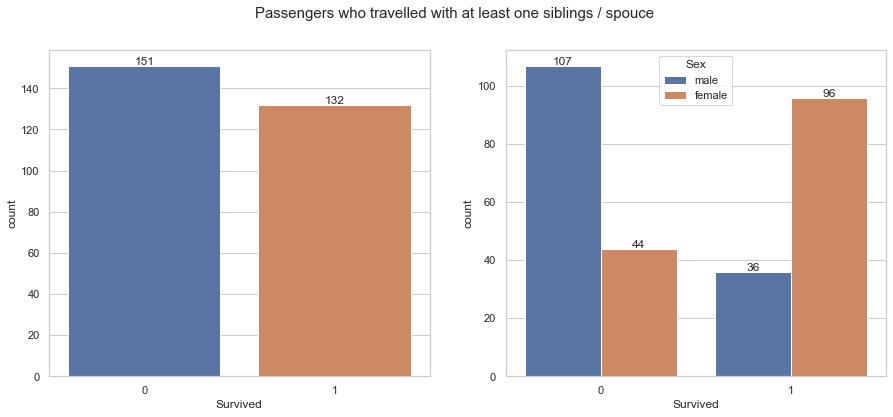

In [51]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['SibSp'] >= 1],ax = ax[0])
sns.countplot(x="Survived", data=train[train['SibSp'] >= 1],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least one siblings / spouce', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [52]:
print('Gender distribution of Passengers who travelled with one or more siblings/spouce')
train[(train['SibSp'] >= 1)]['Sex'].value_counts()

Gender distribution of Passengers who travelled with one or more siblings/spouce


male      143
female    140
Name: Sex, dtype: int64

#### <li>About 46.64% (132) of the total passengers (283) survived who travelled with one or more siblings / spouce. 
#### <li>About 44.58% (140) of the total female-passengers (314) travelled with one or more siblings / spouce. 
#### <li>About 68.57% (96) of the total female-passengers (140) survived who travelled with one or more siblings / spouce.
#### <li>Only 25.17% (36) of the total male-passengers (143) survived who travelled with one or more siblings / spouce.   

##### Passengers travelling with no siblings/spouce

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with no siblings / spouce')

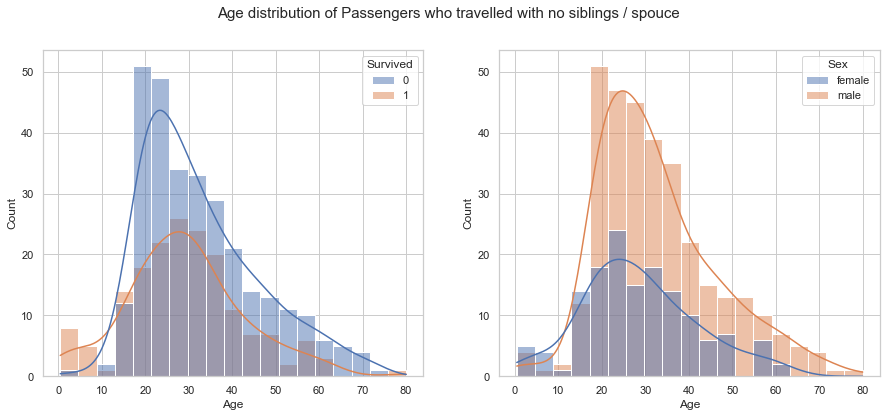

In [53]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=train[(train['SibSp'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train[(train['SibSp'] == 0)],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with no siblings / spouce', fontsize=15)

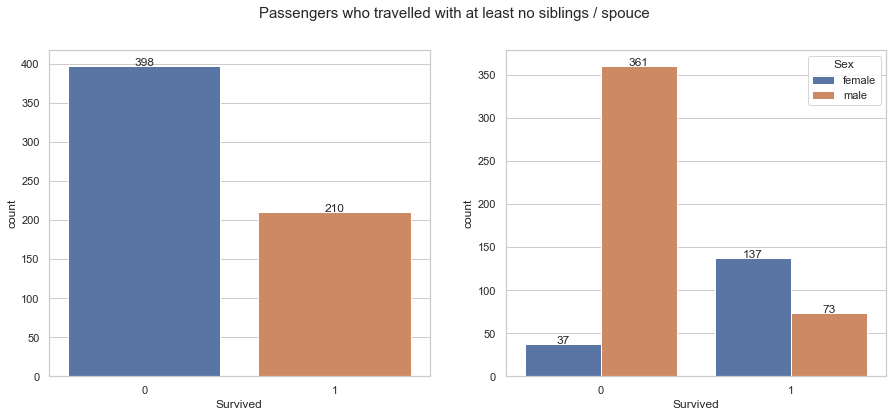

In [54]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['SibSp'] == 0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['SibSp'] == 0],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least no siblings / spouce', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

In [55]:
print('Gender distribution of Passengers who travelled with no siblings')
train[(train['SibSp'] == 0)]['Sex'].value_counts()

Gender distribution of Passengers who travelled with no siblings


male      434
female    174
Name: Sex, dtype: int64

#### <li>Only 34.53% (210) of passengers (610) survived who travelled with no siblings.
#### <li>About 55.51% (174) of the total female-passengers (314) survived travelled with no siblings.     
#### <li>About 78.73% (137) of female-passengers (174) survived who travelled with no siblings.
#### <li>Only 16.62% (73) of male-passengers (434) survived who travelled with no siblings.      

#### Column : Parch (Number of Parents/Children Aboard)
<br>

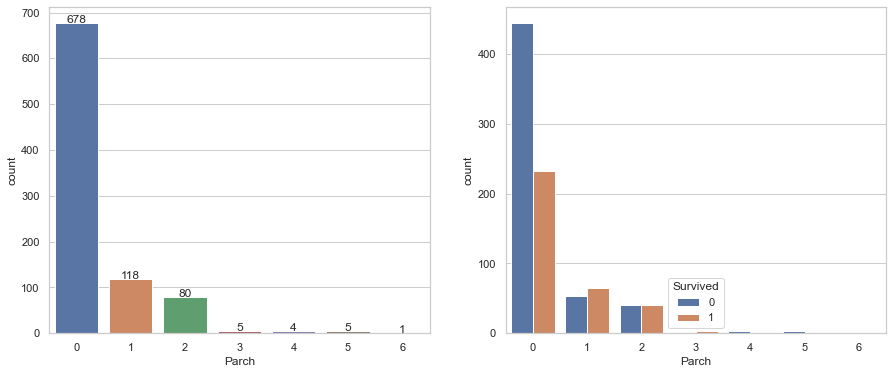

In [56]:

fig,ax = plt.subplots(1, 2,figsize = (15,6))
ax[0] = sns.countplot(x="Parch", data=train,ax = ax[0])
ax[1] = sns.countplot(x="Parch",hue = 'Survived', data=train,ax = ax[1])
#annotatinos
for i in np.arange(1):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

Text(0.5, 0.98, 'Survival Rate vs Parent / child abord ')

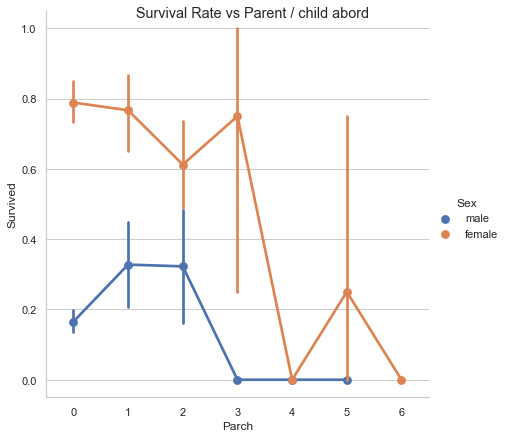

In [57]:
ax = sns.catplot(x ='Parch', y ='Survived',hue = 'Sex',kind = 'point' ,data = train,height = 6)
ax.fig.suptitle('Survival Rate vs Parent / child abord ')

##### Passengers travelling with one or more parents / children.

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with one or more siblings / spouce')

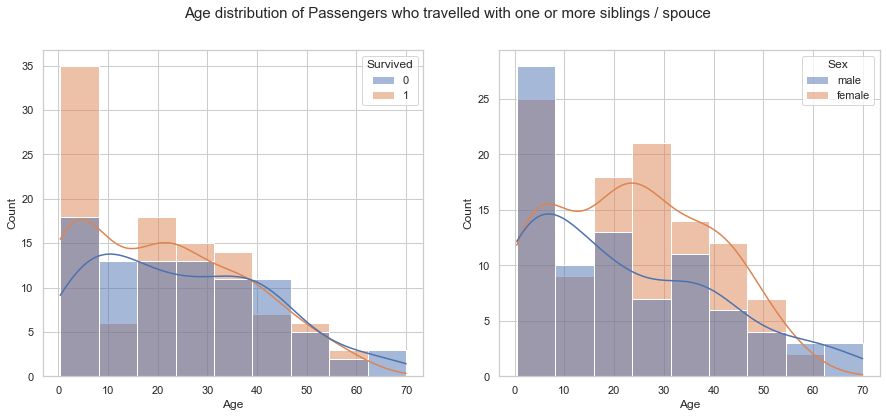

In [58]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True, hue = 'Survived',data=train[train['Parch'] >= 1],ax = ax[0])
sns.histplot(x="Age",kde = True, hue = 'Sex',data=train[train['Parch'] >= 1],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with one or more siblings / spouce', fontsize=15)

In [59]:
print('Age description of passengers who travelled with one or more parents / children')
train[train['Parch'] >= 1]['Age'].describe()

Age description of passengers who travelled with one or more parents / children


count    193.000000
mean      23.006062
std       17.145160
min        0.420000
25%        7.000000
50%       22.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

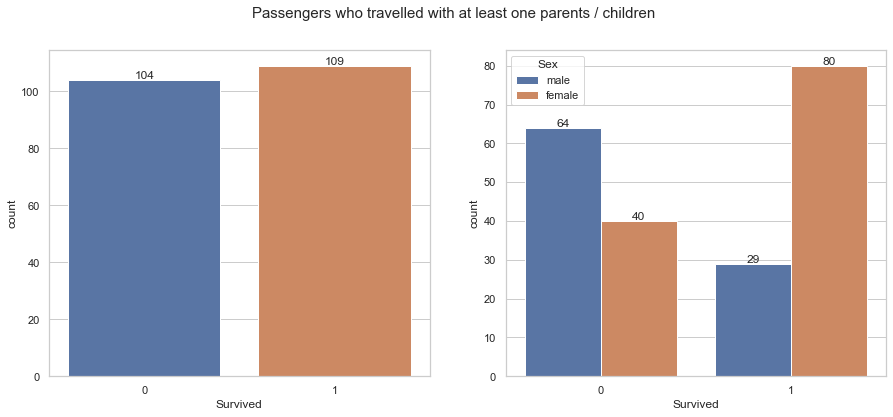

In [60]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Parch'] >= 1],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Parch'] >= 1],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least one parents / children', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 51.17% (109) of the total passengers (213) survived who travelled with one or more parents / children. 
#### <li>About 38.21% (120) of the total female-passengers (314) survived travelled with one or more parents / children. 
#### <li>About 66.66% (80) of the total female-passengers (120) survived who travelled with one or more parents / children.
#### <li>About 38.18% (29) of the total male-passengers (93) survived who travelled with one or more parents / children. 

##### Passengers travelling with no parent  / child.

Text(0.5, 0.98, 'Age distribution of Passengers who travelled with no parent / child')

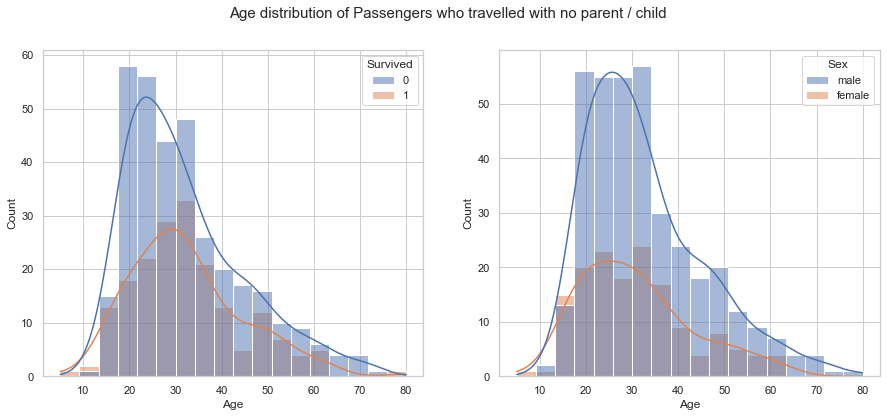

In [61]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=train[(train['Parch'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train[(train['Parch'] == 0)],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled with no parent / child', fontsize=15)

In [62]:
print('Age description of passengers who travelled with no parent / child')
train[train['Parch'] == 0]['Age'].describe()

Age description of passengers who travelled with no parent / child


count    521.000000
mean      32.178503
std       12.570448
min        5.000000
25%       22.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

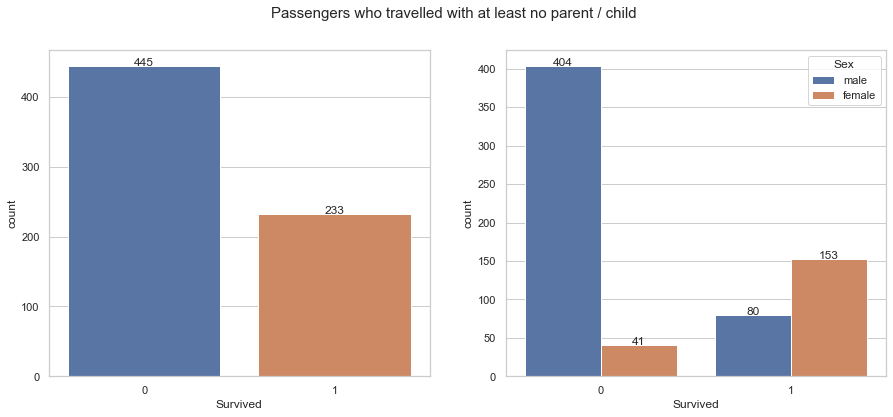

In [63]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[train['Parch'] == 0],ax = ax[0])
sns.countplot(x="Survived", data=train[train['Parch'] == 0],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled with at least no parent / child', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 34.36% (109) of the total passengers (678) survived who travelled with one or more parent / child. 
#### <li>About 48.72% (153) of the total female-passengers (314) survived travelled with one or more parent / child. 
 

##### Passengers travelling without family (without parnent / child or sibling / spouce)

Text(0.5, 0.98, 'Age distribution of Passengers who travelled without family')

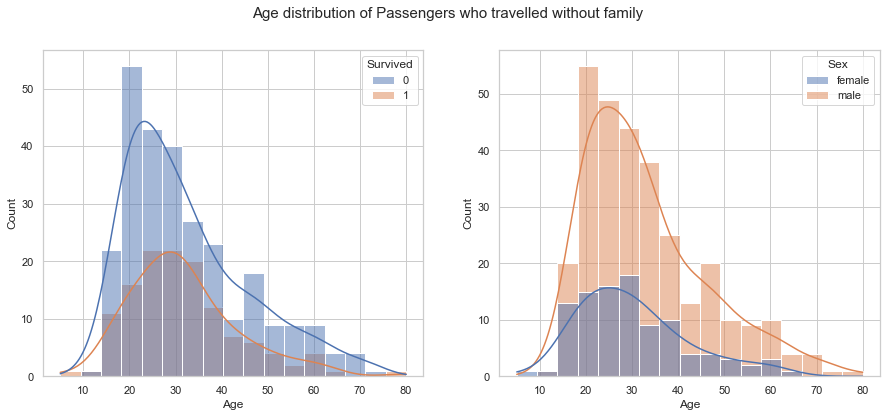

In [64]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.histplot(x="Age",kde = True,hue = 'Survived',data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],ax = ax[0])
sns.histplot(x="Age",kde = True,hue = 'Sex',data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],ax = ax[1])
fig.suptitle('Age distribution of Passengers who travelled without family', fontsize=15)

In [65]:
print('Age description of passengers who travelled without family')
train[(train['Parch'] == 0) & (train['SibSp'] == 0)]['Age'].describe()

Age description of passengers who travelled without family


count    404.000000
mean      32.220297
std       12.899871
min        5.000000
25%       22.000000
50%       29.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

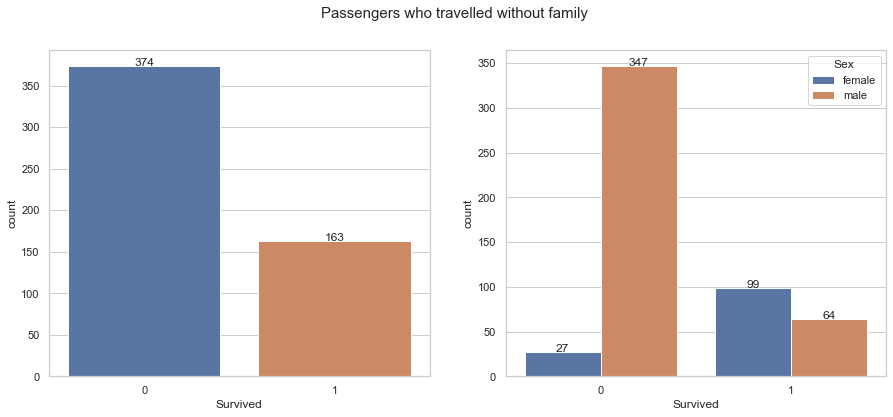

In [66]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.countplot(x="Survived", data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],ax = ax[0])
sns.countplot(x="Survived", data=train[(train['Parch'] == 0) & (train['SibSp'] == 0)],hue = 'Sex',ax = ax[1])
fig.suptitle('Passengers who travelled without family', fontsize=15)
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")

#### <li>About 60.26% (537) of the passengers (891) travelled without family.
#### <li>About 84.42% (347) of the male passengers (411) who travelled without family couldn\'t survive

Let's add a column indicator column "without_family" to indicate if someone is travelling without family

In [67]:
train['Without_family'] = np.where((train['Parch'] == 0) & (train['SibSp'] == 0),1,0)

#### Column: Fare
<br>

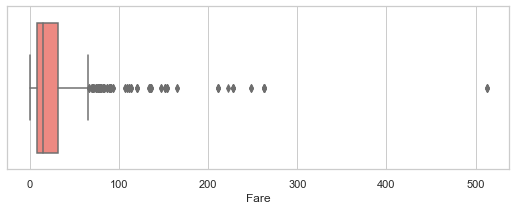

In [68]:
fig,ax = plt.subplots(figsize = (9,3))
ax = sns.boxplot(x=train['Fare'],color = '#ff7a70')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

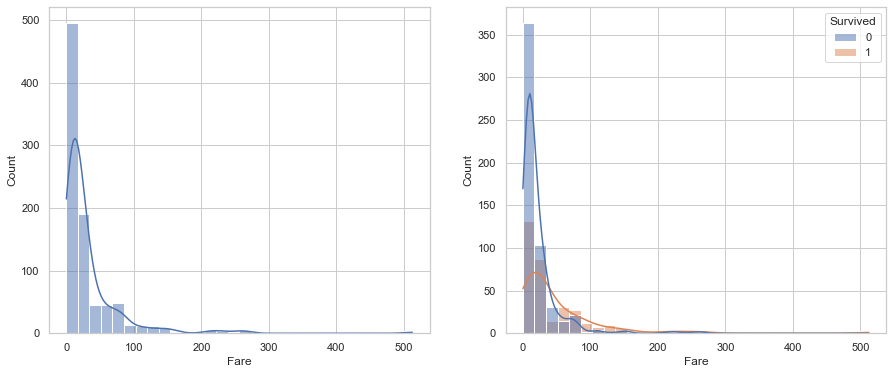

In [69]:

fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True, data=train,ax = ax[0])
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data=train,ax = ax[1])

##### Fare Vs Passengers class

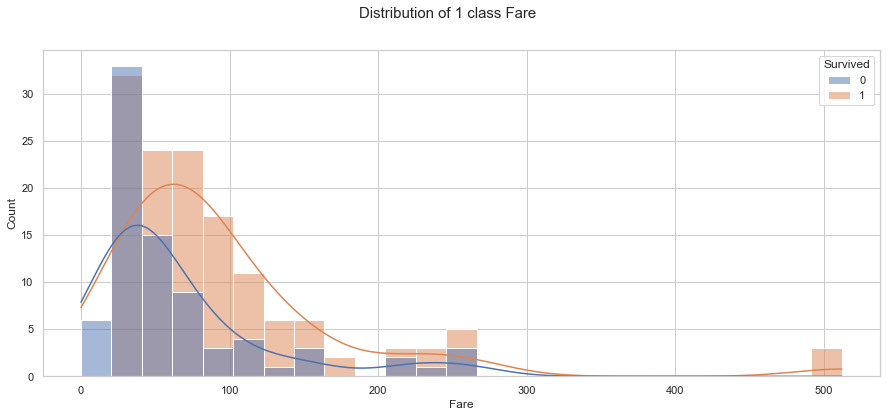

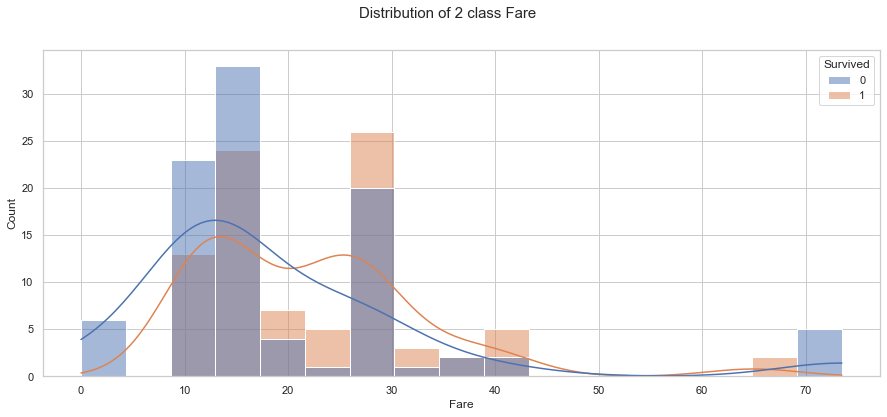

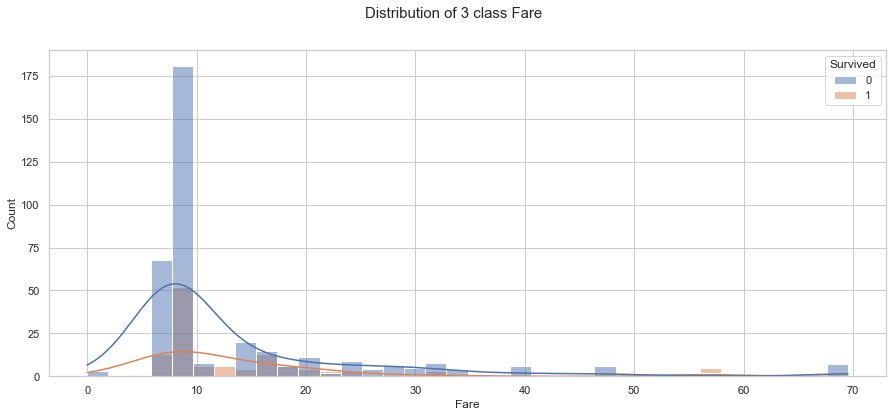

In [70]:
for i in np.arange(1,4):
    fig,ax = plt.subplots(figsize = (15,6))
    sns.histplot(x="Fare",hue = 'Survived',kde = True,data = train[train['Pclass'] == i])
    fig.suptitle(f'Distribution of {i} class Fare', fontsize=15)


##### Analysis of passengers whose fare is more than £ 100

Text(0.5, 0.98, 'Passengers whose Fare is more than £ 100')

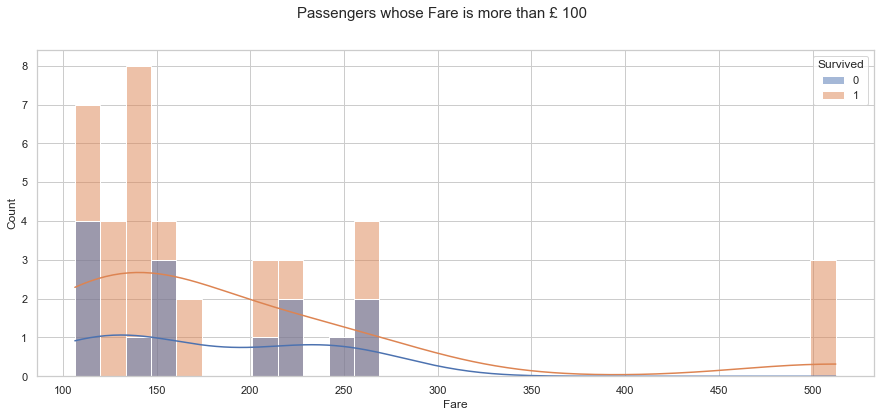

In [71]:

fig,ax = plt.subplots(figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data = train[train['Fare'] >= 100 ])
fig.suptitle('Passengers whose Fare is more than £ 100', fontsize=15)

Text(0.5, 0.98, 'Survival of Passengers whose Fare is more than £ 100')

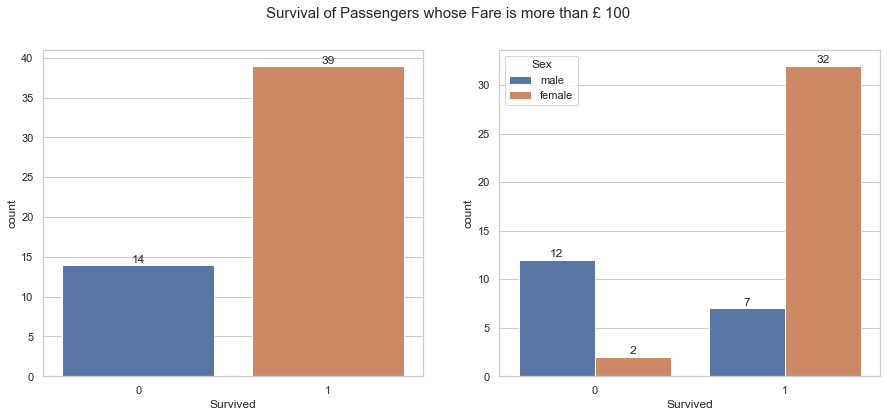

In [72]:

fig,ax = plt.subplots(1,2,figsize = (15,6))
ax[0] = sns.countplot(x="Survived", data = train[train['Fare'] >= 100 ],ax = ax[0])
ax[1] = sns.countplot(x="Survived", data = train[train['Fare'] >= 100 ],hue = 'Sex',ax = ax[1])
#annotatinos
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + .3,height ,ha="center")
        
fig.suptitle('Survival of Passengers whose Fare is more than £ 100', fontsize=15)        

In [73]:
print('Survived passengers whose ticket costs more than £ 100')
train[train['Fare'] >= 100 ]['Survived'].value_counts()

Survived passengers whose ticket costs more than £ 100


1    39
0    14
Name: Survived, dtype: int64

In [74]:
print('Sex composition survived passengers whose ticket costs more than £ 100')
train[(train['Fare'] >= 100) & train['Survived'] == 1]['Sex'].value_counts()

Sex composition survived passengers whose ticket costs more than £ 100


female    32
male       7
Name: Sex, dtype: int64

#### <li>About 5.94% (53) of the total passenger's (891) fare was more than £ 100. 
#### <li>About 73.58% (39) of those passengers (53) survived. 
#### <li>About 82.05% (32) of those survived (39) were females.

##### Analysis of passengers whose fare is less than £ 50

Text(0.5, 0.98, 'Passengers whose Fare is less than £ 50')

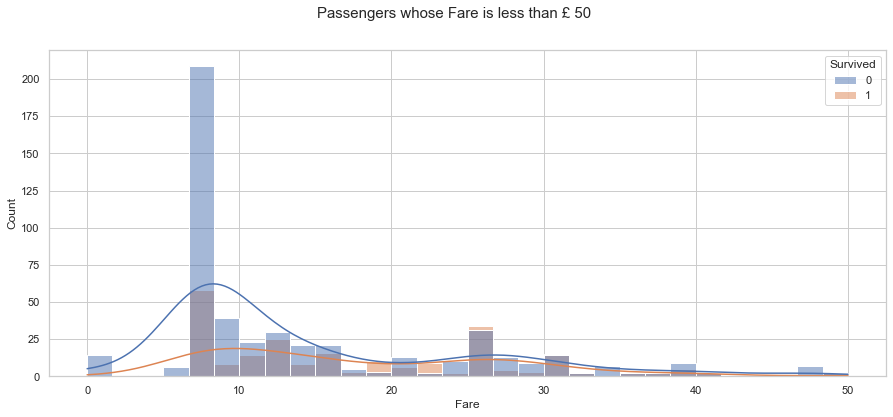

In [75]:

fig,ax = plt.subplots(figsize = (15,6))
sns.histplot(x="Fare",bins=30,kde = True,hue = 'Survived', data = train[train['Fare'] <= 50 ])
fig.suptitle('Passengers whose Fare is less than £ 50', fontsize=15)

Text(0.5, 0.98, 'Survival of Passengers whose Fare is less than £ 50')

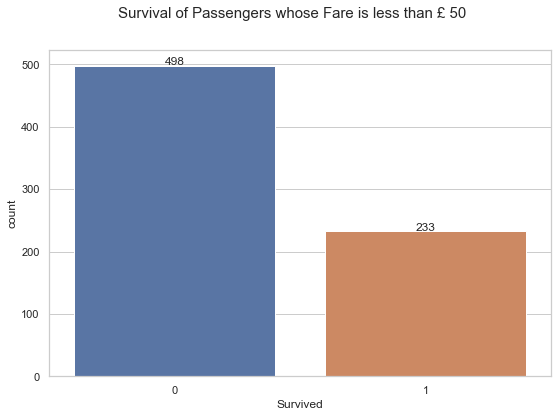

In [76]:
fig,ax = plt.subplots(figsize = (9,6))
ax = sns.countplot(x="Survived", data = train[train['Fare'] <= 50 ])
#annotatinos
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
fig.suptitle('Survival of Passengers whose Fare is less than £ 50', fontsize=15)    

#### <li>About 82.04% (731) of the total passenger's (891) fare was less than £ 50. 
#### <li>Only 31.87% (233) of those survived (731) survived.

#### Column : Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
<br>

Text(0.5, 0.98, 'Passengers count')

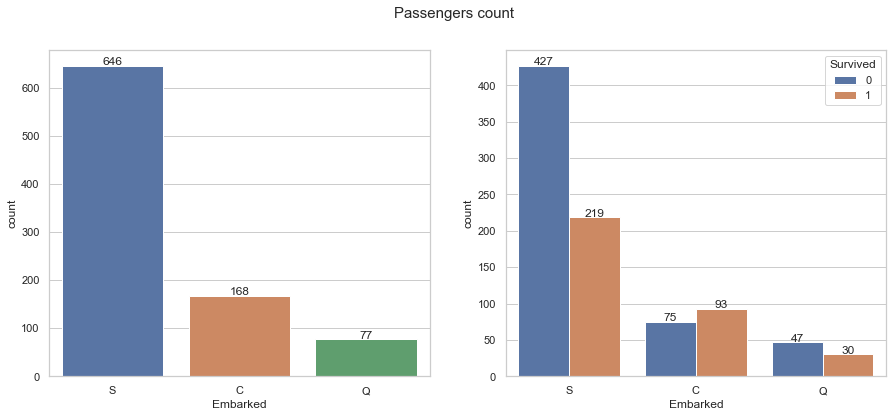

In [77]:

fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Embarked",data=train,ax = ax[0])
sns.countplot(x="Embarked",hue = 'Survived', data=train,ax = ax[1])
#annnotations
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
#add title
fig.suptitle('Passengers count', fontsize=15)   

In [78]:
fig = px.pie(train,
             values="Fare",
             names="Embarked",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.update(layout_title_text='Percentage of Fare collected through Embarked',
           layout_showlegend=False)
fig.show()


Text(0.5, 0.98, 'Ticket Class and Sex composition')

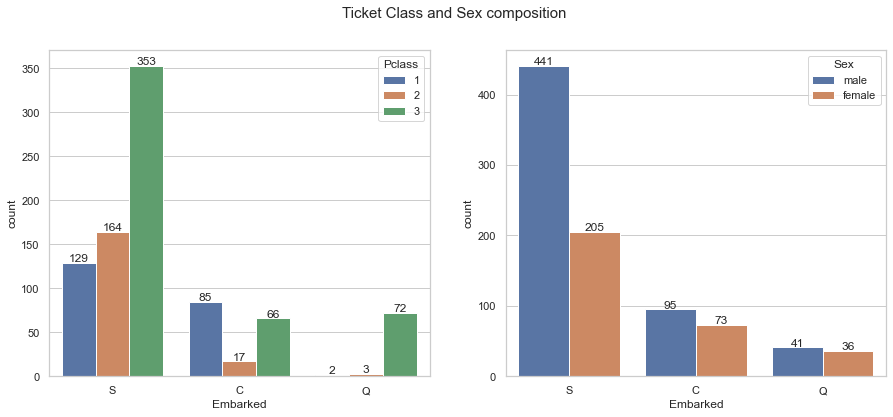

In [79]:

fig,ax = plt.subplots(1, 2,figsize = (15,6))
sns.countplot(x="Embarked",hue = 'Pclass',data=train,ax = ax[0])
sns.countplot(x="Embarked",hue = 'Sex', data=train,ax = ax[1])
#annnotations
for i in np.arange(2):
    for p in ax[i].patches:
        height = p.get_height()
        ax[i].text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
#add title
fig.suptitle('Ticket Class and Sex composition', fontsize=15)

#### Skewness

In [80]:
train.skew()

PassengerId       0.000000
Survived          0.478523
Pclass           -0.630548
Age               0.389108
SibSp             3.695352
Parch             2.749117
Fare              4.787317
Age_missing       1.513110
Without_family   -0.420431
dtype: float64

#### Kurtosis

In [81]:
train.kurt()

PassengerId       -1.200000
Survived          -1.775005
Pclass            -1.280015
Age                0.178274
SibSp             17.880420
Parch              9.778125
Fare              33.398141
Age_missing        0.290150
Without_family    -1.827345
dtype: float64

#### IQR (Inter Quartile Range)

In [82]:
for i in train.columns[1:]:
    if train[i].dtype != 'object':
        print(i)
        print('IQR: ',train[i].quantile(.75) - train[i].quantile(.25))
        print('')


Survived
IQR:  1.0

Pclass
IQR:  1.0

Age
IQR:  17.875

SibSp
IQR:  1.0

Parch
IQR:  0.0

Fare
IQR:  23.0896

Age_missing
IQR:  0.0

Without_family
IQR:  1.0



#### Let's See the Correlation among these attributes

In [83]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId        1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived          -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass            -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age                0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp             -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch             -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare               0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Age_missing       -0.020167 -0.092197  0.172933       NaN  0.018958 -0.124104   
Without_family     0.057462 -0.203367  0.135207  0.198270 -0.584471 -0.583398   

                    Fare  Age_missing  Without_family  
PassengerId     0.012658    -0.020167        0.057462  
Survived        0.257307    -0.092197       -0.203367  
Pclass         -0.549500     0.172933        0.135207  
Age             0.096067          NaN        0.198270  
SibSp           0.159651     0.018958       -0.584471  
Parch           0.216225    -0.124104       -0.583398  
Fare            1.000000    -0.100707       -0.271832  
Age_missing    -0.100707     1.000000        0.151319  
Without_family -0.271832     0.151319        1.000000

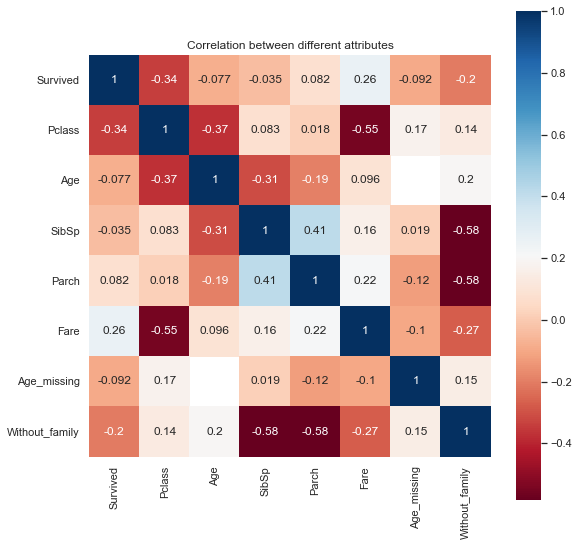

In [84]:
plt.figure(figsize=(9,9))
sns.heatmap(train.drop('PassengerId',axis = 1).corr(), vmax=1, square=True,annot=True,cmap='RdBu')
plt.title('Correlation between different attributes')
plt.show()

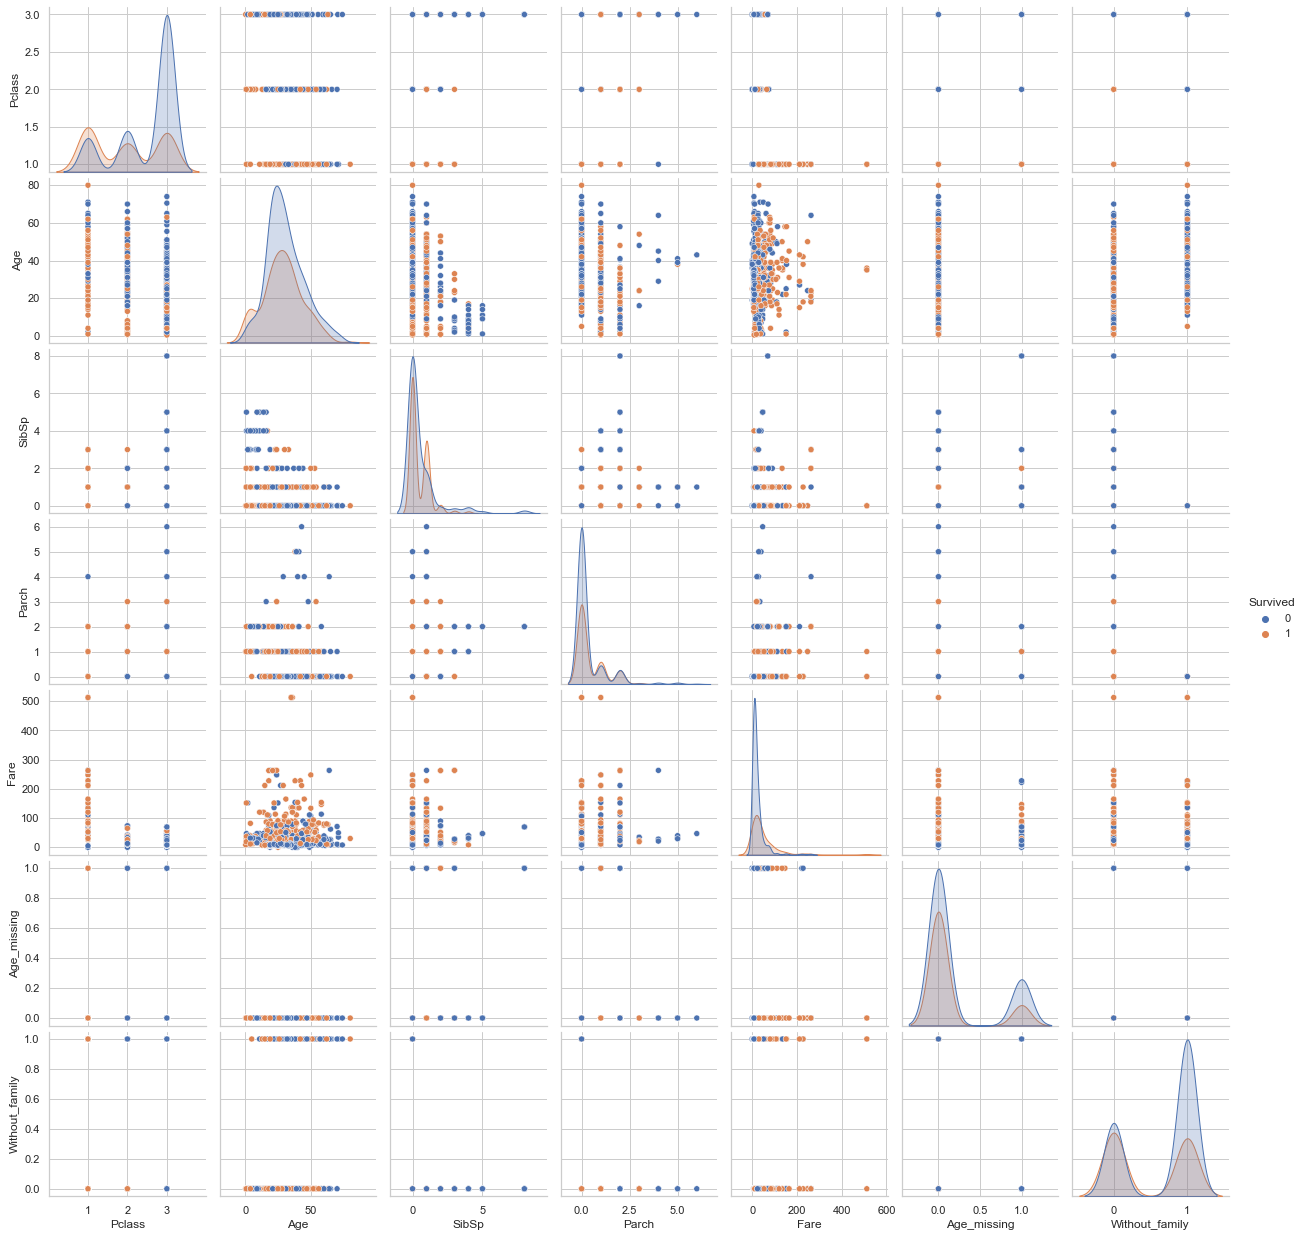

In [85]:
sns.pairplot(train.drop('PassengerId',axis = 1), hue="Survived")

In [86]:
len(train[(train['Age']<= 5)])

44

In [87]:
len(train[(train['Age']<= 5) & train['Survived'] == 1])

31

#### One-hot encoding

In [88]:
train = train.drop(['PassengerId','Name','Ticket','Ticket_prefix'],axis = 1)
train = pd.get_dummies(train)

In [89]:
train

Survived  Pclass   Age  SibSp  Parch     Fare  Age_missing  \
0           0       3  22.0      1      0   7.2500            0   
1           1       1  38.0      1      0  71.2833            0   
2           1       3  26.0      0      0   7.9250            0   
3           1       1  35.0      1      0  53.1000            0   
4           0       3  35.0      0      0   8.0500            0   
..        ...     ...   ...    ...    ...      ...          ...   
886         0       2  27.0      0      0  13.0000            0   
887         1       1  19.0      0      0  30.0000            0   
888         0       3   NaN      1      2  23.4500            1   
889         1       1  26.0      0      0  30.0000            0   
890         0       3  32.0      0      0   7.7500            0   

     Without_family  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
0                 0           0         1           0           0           1   
1                 0           1         0           1           0           0   
2                 1           1         0           0           0           1   
3                 0           1         0           0           0           1   
4                 1           0         1           0           0           1   
..              ...         ...       ...         ...         ...         ...   
886               1           0         1           0           0           1   
887               1           1         0           0           0           1   
888               0           1         0           0           0           1   
889               1           0         1           1           0           0   
890               1           0         1           0           1           0   

     Name_prefix_ Master  Name_prefix_ Miss  Name_prefix_ Mr  \
0                      0                  0                1   
1                      0                  0                0   
2                      0                  1                0   
3                      0                  0                0   
4                      0                  0                1   
..                   ...                ...              ...   
886                    0                  0                0   
887                    0                  1                0   
888                    0                  1                0   
889                    0                  0                1   
890                    0                  0                1   

     Name_prefix_ Mrs  Name_prefix_Rare  
0                   0                 0  
1                   1                 0  
2                   0                 0  
3                   1                 0  
4                   0                 0  
..                ...               ...  
886                 0                 1  
887                 0                 0  
888                 0                 0  
889                 0                 0  
890                 0                 0  

[891 rows x 18 columns]

#### Impute the missing values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # just the features
    train['Survived'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((623, 17), (268, 17))

In [92]:
#impute the misssing values with median
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())

In [93]:
# #transform the age into category
# def transform_age(x):
#     if 0<= x<=5.0:
#         return 0
#     if 5.0< x<=20.0:
#         return 1
#     if 20.0< x<=40.0:
#         return 2 
#     if 40.0< x<=60.0:
#         return 3
#     if 60.0< x<=80.0:
#         return 4    
# def minor_indicator(x):
#     if x<= 18.0:
#         return 1
#     else:
#         return 0

In [94]:
# X_train['Passenger_minor'] = X_train['Age'].apply(lambda x: minor_indicator(x))
# X_test['Passenger_minor'] = X_test['Age'].apply(lambda x: minor_indicator(x))

#### Scale the data

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Model Preparation

#### Logistic Regression(Lasso)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [97]:
logisticRegr = LogisticRegression(penalty='l1', solver='liblinear')
#fit the model
logisticRegr.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [98]:
#predictions and score
predictions = logisticRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8208955223880597
The score on the Train-dataset is 0.8378812199036918


In [99]:
def plot_condution_metrics(y_test,predictions):
    #condusion metrics
    cm = metrics.confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

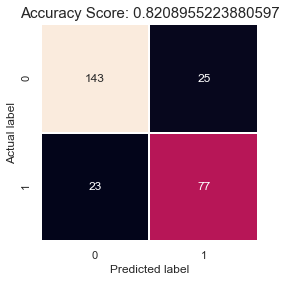

In [100]:
#confusion metrics
plot_condution_metrics(y_test,predictions)

In [101]:
#cross-val score
score = cross_val_score(logisticRegr, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.826685070163331


In [102]:
#store the cv-score
model_performance = {}
model_performance['Logistic Regression(Lasso)'] = score.mean()

#### Logistic Regression(Ridge)

In [103]:
logisticRegr = LogisticRegression(penalty='l2', solver='liblinear')
#fit the model
logisticRegr.fit(X_train_std, y_train)

LogisticRegression(solver='liblinear')

In [104]:
#predictions and score
predictions = logisticRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8246268656716418
The score on the Train-dataset is 0.8362760834670947


In [105]:
def plot_condution_metrics(y_test,predictions):
    #condusion metrics
    cm = metrics.confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

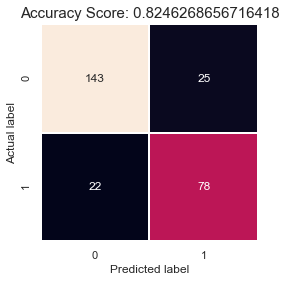

In [106]:
#confusion metrics
plot_condution_metrics(y_test,predictions)

In [107]:
#cross-val score
score = cross_val_score(logisticRegr, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8234644582470669


In [108]:
model_performance['Logistic Regression(Ridge)'] = score.mean()

#### Polynomial Logistic Regression

In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

#trasform into polynomial features
X_train_p = poly.fit_transform(X_train)
X_test_p = poly.fit_transform(X_test)

#standard scale
scaler = StandardScaler()
scaler.fit(X_train_p)
X_train_std = scaler.transform(X_train_p)
X_test_std = scaler.transform(X_test_p)

In [110]:
#fit the model
logisticPolyRegr = LogisticRegression(solver='liblinear')
logisticPolyRegr.fit(X_train_std, y_train)

#predictions and score
predictions = logisticPolyRegr.predict(X_test_std)
print(f"The score on the Test-dataset is {logisticPolyRegr.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {logisticPolyRegr.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8134328358208955
The score on the Train-dataset is 0.8683788121990369


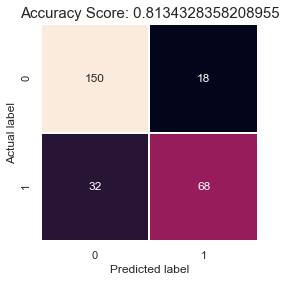

In [111]:
plot_condution_metrics(y_test,predictions)

In [112]:
#cross-val score
score = cross_val_score(logisticPolyRegr, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8138946399815965


In [113]:
model_performance['Polynomial Logistic Regression'] = score.mean()

#### Cross-validation and Hypeer-parameter tuning

In [114]:
poly_degrees = [2,3,4]
degree_loop_values = []
for degree in poly_degrees:
    poly = PolynomialFeatures(degree = degree)

    #trasform into polynomial features
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    #standard scale
    scaler = StandardScaler()
    scaler.fit(X_train_p)
    X_train_std = scaler.transform(X_train_p)
    X_test_std = scaler.transform(X_test_p)
    
    logisticPolyRegr = LogisticRegression(solver='liblinear')
    logisticPolyRegr.fit(X_train_std, y_train)

    score = cross_val_score(logisticPolyRegr, X_train_std, y_train, cv=10,scoring='accuracy')
    degree_loop_values.append([degree,score.mean(),np.std(score)])

In [115]:
degree_loop_values

[[2, 0.8058627752176137, 0.052595517886579526],
 [3, 0.7946236559139784, 0.04775468078460737],
 [4, 0.7849974398361494, 0.05156741995790041]]

The best-fit polynomial degree is 2

#### Naive Bayes

In [116]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # just the features
    train['Survived'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

((623, 17), (268, 17))

In [117]:
#impute the misssing values with median
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())
#scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [118]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
predictions = gnb.fit(X_train, y_train).predict(X_test)

In [119]:
print(f"The score on the Test-dataset is {gnb.score(X_test, y_test)}")
print(f"The score on the Train-dataset is {gnb.score(X_train, y_train)}")

The score on the Test-dataset is 0.7761194029850746
The score on the Train-dataset is 0.8057784911717496


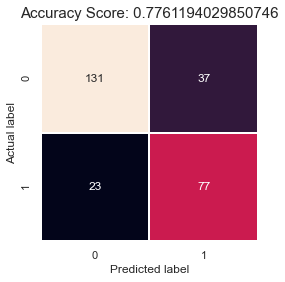

In [120]:
plot_condution_metrics(y_test,predictions)

In [121]:
#cross-val score
score = cross_val_score(gnb, X_train, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8059351276742581


In [122]:
model_performance['Naive Bayes (gausian)'] = score.mean()

#### Support Vector Machine

In [123]:
from sklearn.svm import SVC

#### Grid-Search CV to find the optimum parameters

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        "C" : [0.1,0.3,0.39,0.33],
        "gamma" : ['scale',0.081,0.09,0.1,0.2],
        "kernel" : ['rbf']
        
    },
]
optimat_parameters = GridSearchCV(
    SVC(),
    param_grid,
    cv = 9,
    scoring = 'accuracy',
    verbose = 0
)
optimat_parameters.fit(X_train_std,y_train)
print(optimat_parameters.best_params_)

{'C': 0.39, 'gamma': 'scale', 'kernel': 'rbf'}


#### Builing the optimam SVM model

In [125]:
from sklearn import svm
clf = svm.SVC(C =  0.39, gamma = 'scale',kernel = 'rbf',random_state = 42)
predictions = clf.fit(X_train_std, y_train).predict(X_test_std)

In [126]:
print(f"The score on the Test-dataset is {clf.score(X_test_std, y_test)}")
print(f"The score on the Train-dataset is {clf.score(X_train_std, y_train)}")

The score on the Test-dataset is 0.8246268656716418
The score on the Train-dataset is 0.8443017656500803


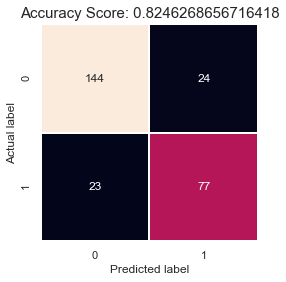

In [127]:
plot_condution_metrics(y_test,predictions)

In [128]:
#cross-val score
score = cross_val_score(clf, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8427421210029906


In [129]:
model_performance['SVM (rbf)'] = score.mean()

#### Decision Trees

In [130]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf_dt = DecisionTreeClassifier(random_state=42)

In [131]:
# separate intro train and test set

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),  # just the features
    train['Survived'],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0)  # for reproducibility

X_train.shape, X_test.shape

#impute the misssing values with median
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].median())

In [132]:
#build a preliminary tree
predictions = clf_dt.fit(X_train, y_train).predict(X_test)

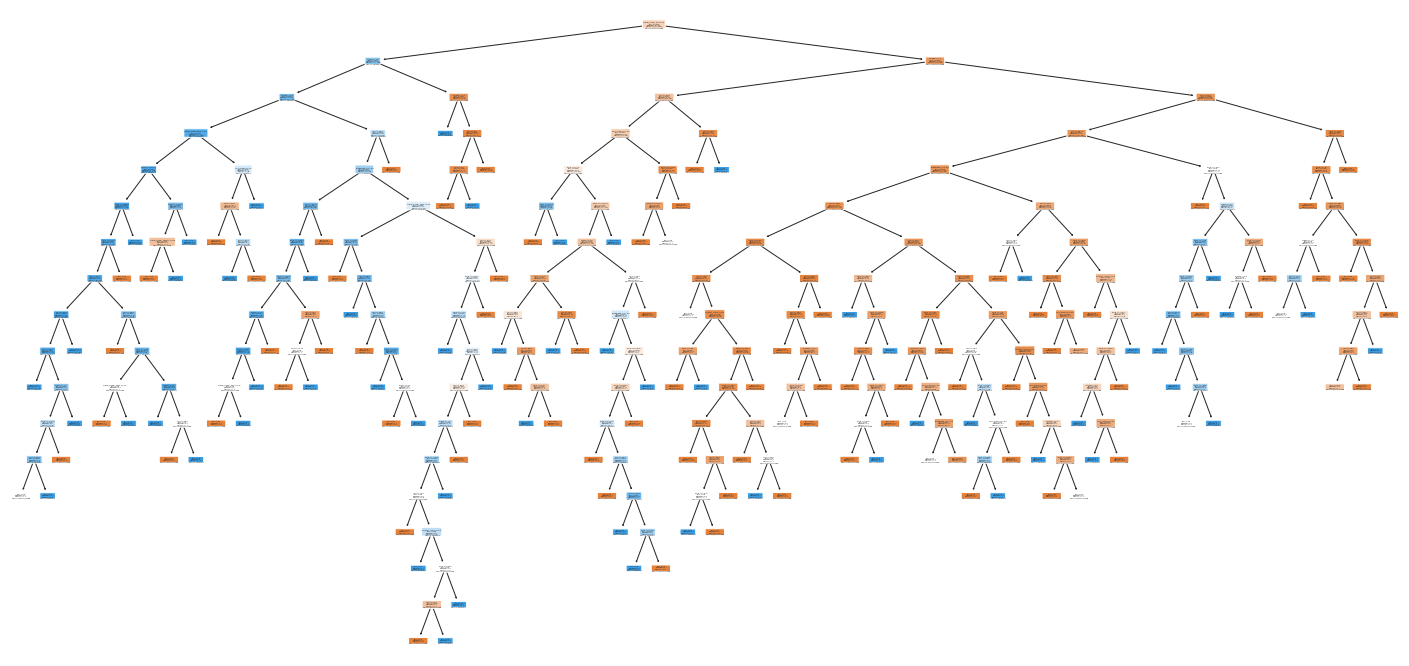

In [133]:
fig,ax = plt.subplots(figsize = (25,12))
ax = plot_tree(
    clf_dt,
    filled = True,
    rounded = True,
    class_names = ['Not Survived',"Survived"],
    feature_names = train.drop('Survived', axis=1).columns
    
)

In [134]:
print(f"The score on the Test-dataset is {clf_dt.score(X_test, y_test)}")
print(f"The score on the Train-dataset is {clf_dt.score(X_train, y_train)}")

The score on the Test-dataset is 0.7574626865671642
The score on the Train-dataset is 0.9823434991974318


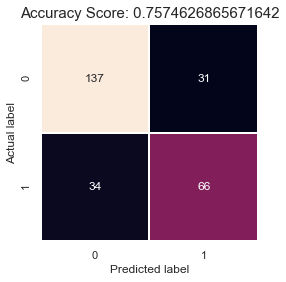

In [135]:
plot_condution_metrics(y_test,predictions)

In [136]:
#cross-val score
score = cross_val_score(clf_dt, X_train, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.7608005521048998


#### Cost-complxity prunnig the decison tree

In [137]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

cct_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train,y_train)
    cct_dts.append(clf_dt)
    


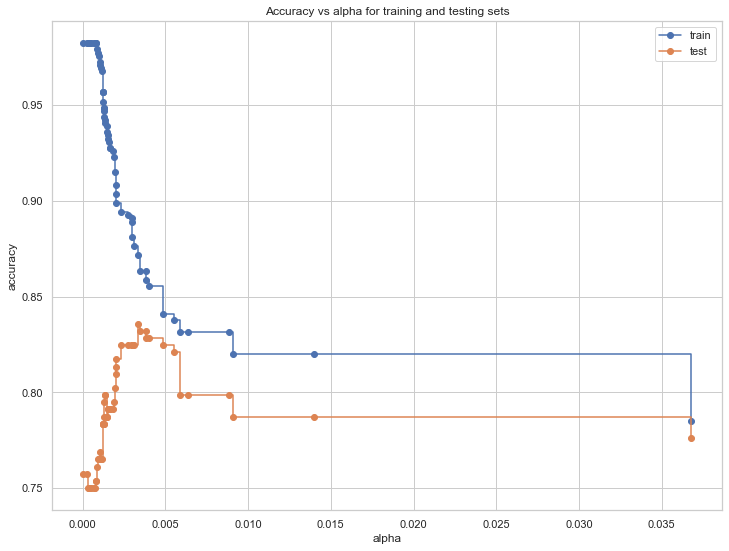

In [138]:
train_scores = [clf.score(X_train, y_train) for clf in cct_dts]
test_scores = [clf.score(X_test, y_test) for clf in cct_dts]

fig, ax = plt.subplots(figsize = (12,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### Cross validation to find the optimal value of alpha

<AxesSubplot:xlabel='tree'>

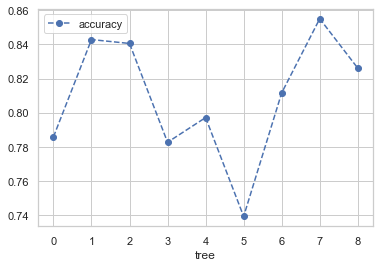

In [139]:
#looking at the figure and 'eye-balling' we see the alpha of 0.00375 could be a bette value
# using K-fold CV
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha = 0.00375)
scores = cross_val_score(clf_dt, X_train, y_train, cv=9,scoring='accuracy')
#plot 
df_cv = pd.DataFrame(data = {'tree' : range(9),'accuracy':scores})
df_cv.plot(x = 'tree',y = 'accuracy',marker = 'o',linestyle = '--')

 As we see on one split i returns a very low accuracy of about 73%. So this value of alpha may not be the best
 So we use K-fold CV on all the values of alpha to find the optimum parameter

<AxesSubplot:xlabel='alpha'>

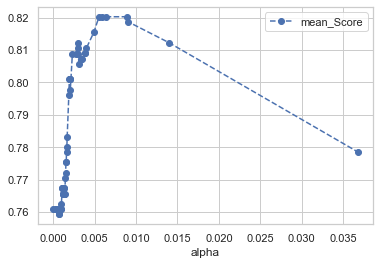

In [140]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=9,scoring='accuracy')
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
#storing in a pandas datframe
alpha_df = pd.DataFrame(alpha_loop_values,columns = ['alpha','mean_Score','std_score'])

#plot df
alpha_df.plot(x = 'alpha',y = 'mean_Score',marker = 'o',linestyle = '--')

In [141]:
print('alpha values with cv score > .8')
alpha_df[alpha_df['mean_Score'] > .8 ].sort_values(by = 'mean_Score',ascending = False)

alpha values with cv score > .8


alpha  mean_Score  std_score
55  0.008865    0.820267   0.041963
54  0.006352    0.820267   0.044131
53  0.005899    0.820267   0.040260
52  0.005512    0.820267   0.040260
56  0.009069    0.818657   0.039109
51  0.004883    0.815436   0.045586
57  0.013972    0.812261   0.031608
42  0.002963    0.812100   0.041215
50  0.003985    0.810582   0.036408
43  0.002981    0.810490   0.044208
48  0.003819    0.808972   0.034684
49  0.003852    0.808972   0.034684
41  0.002737    0.808903   0.042675
44  0.003010    0.808903   0.044809
40  0.002293    0.808880   0.049379
47  0.003478    0.807361   0.031336
46  0.003371    0.807361   0.031336
45  0.003083    0.805751   0.036911
36  0.001961    0.800920   0.047647
38  0.002009    0.800920   0.047647
37  0.002006    0.800920   0.047647
35  0.001924    0.800920   0.047647

So the best value of alpha is 0.005899

In [142]:
ideal_alpha = 0.008865

#### Building the best tree

In [143]:
clf_dt_prune = DecisionTreeClassifier(random_state=42,ccp_alpha = ideal_alpha)
predictions = clf_dt_prune.fit(X_train, y_train).predict(X_test)

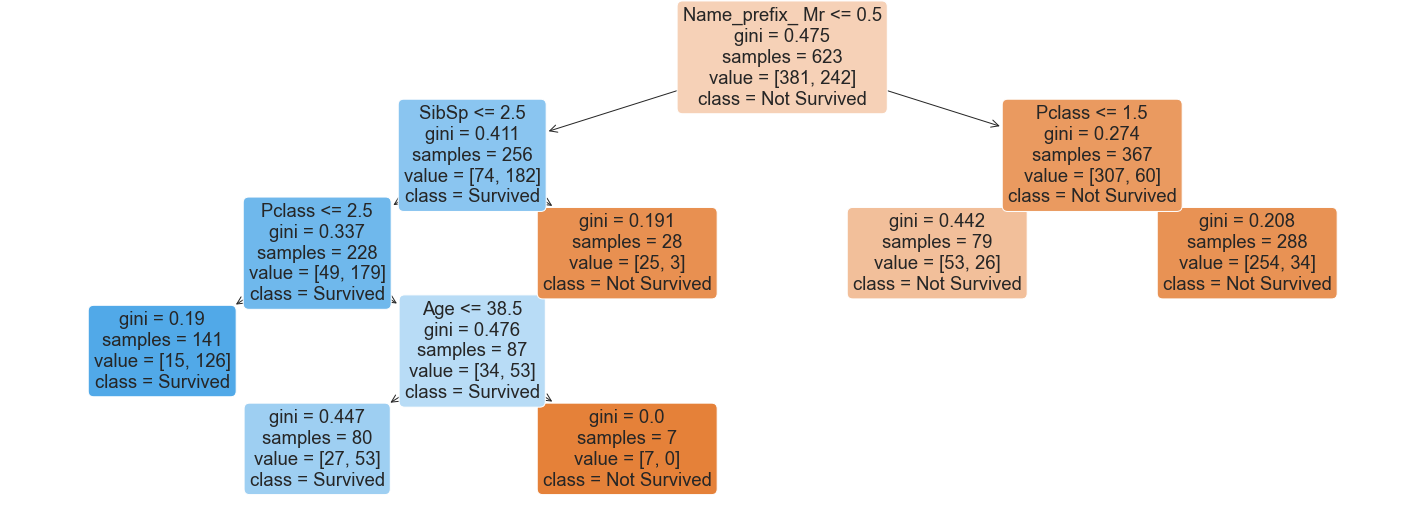

In [144]:
fig,ax = plt.subplots(figsize = (25,9))
ax = plot_tree(
    clf_dt_prune,
    filled = True,
    rounded = True,
    class_names = ['Not Survived',"Survived"],
    feature_names = train.drop('Survived', axis=1).columns
    
)

In [145]:
print(f"The score on the Test-dataset is {clf_dt_prune.score(X_test, y_test)}")
print(f"The score on the Train-dataset is {clf_dt_prune.score(X_train, y_train)}")

The score on the Test-dataset is 0.7985074626865671
The score on the Train-dataset is 0.8314606741573034


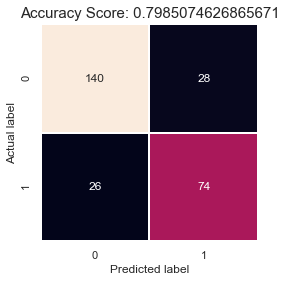

In [146]:
plot_condution_metrics(y_test,predictions)

In [147]:
#cross-val score
score = cross_val_score(clf_dt_prune, X_train_std, y_train, cv=9,scoring='accuracy')
print(f'The Cross-Valiation Score is {score.mean()}')

The Cross-Valiation Score is 0.8202668507016333


In [148]:
model_performance['Decison Tree'] = score.mean()

#### Visualizing the model performance

In [149]:
model_performance

{'Logistic Regression(Lasso)': 0.826685070163331,
 'Logistic Regression(Ridge)': 0.8234644582470669,
 'Polynomial Logistic Regression': 0.8138946399815965,
 'Naive Bayes (gausian)': 0.8059351276742581,
 'SVM (rbf)': 0.8427421210029906,
 'Decison Tree': 0.8202668507016333}

In [150]:
model_df = pd.DataFrame.from_dict(model_performance,orient = 'index',columns = ['Mean CV Score'])
model_df = model_df.sort_values(by ='Mean CV Score',ascending = False)
model_df

Mean CV Score
SVM (rbf)                            0.842742
Logistic Regression(Lasso)           0.826685
Logistic Regression(Ridge)           0.823464
Decison Tree                         0.820267
Polynomial Logistic Regression       0.813895
Naive Bayes (gausian)                0.805935

<AxesSubplot:xlabel='Mean CV Score'>

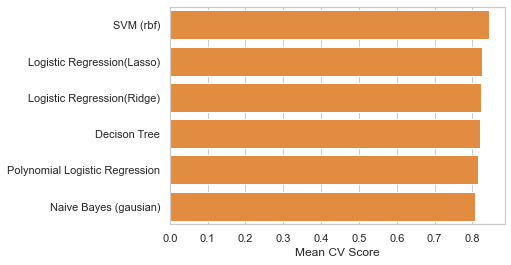

In [151]:
sns.barplot(x="Mean CV Score", y=model_df.index, data=model_df,color = '#fc8a26')

#### As we can see the Support Vector Machine with the 'rbf' kernel gives the best result